Dataset loaded for Phase 3!
Shape: (1000, 9)
Training Samples: 750
Testing Samples:  250
 Training Ensemble Model...

 Ensemble Model Performance (Stacking Regressor):
MAE:  79.0586
RMSE: 114.2183
R²:   0.9295


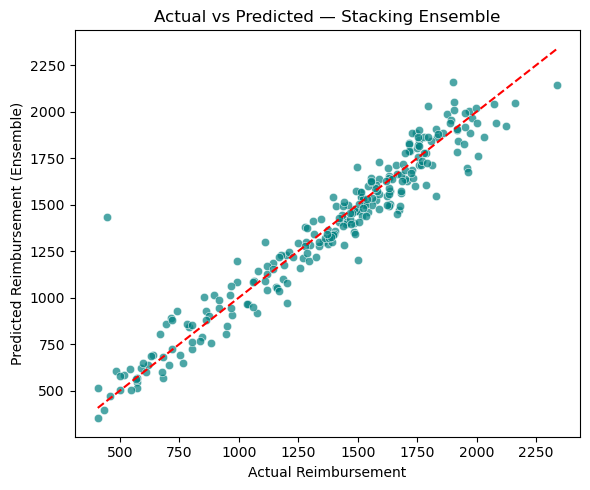

NameError: name 'joblib' is not defined

In [1]:
# ==========================================================
# Phase 3 – Ensemble Learning (Stacking Regressor)
# ==========================================================

from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import pandas as pd
import numpy as np
import joblib

# Load the enhanced dataset from Phase 2
combined_df = pd.read_csv("phase2_features_baseline_models.csv")

print("Dataset loaded for Phase 3!")
print("Shape:", combined_df.shape)

# ---------------------------------------
# Select Features and Target
# ---------------------------------------
features = [
    "trip_duration_days",
    "miles_traveled",
    "total_receipts_amount",
    "cost_per_day",
    "cost_per_mile",
    "miles_per_day",
    "cost_ratio"
]

target = "reimbursement"

X = combined_df[features]
y = combined_df[target]

# ---------------------------------------
# Manual 75/25 split
# ---------------------------------------
split = int(0.75 * len(combined_df))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples:  {len(X_test)}")
print(" Training Ensemble Model...")

# ----------------------------------------------------------
# Define Base Models
# ----------------------------------------------------------
base_models = [
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
]

# ----------------------------------------------------------
# Meta-Learner (Final model that blends predictions)
# ----------------------------------------------------------
meta_model = LinearRegression()

# ----------------------------------------------------------
# Build Stacking Regressor
# ----------------------------------------------------------
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True  # includes original features + model predictions
)

# Train Stacking Ensemble
stack_model.fit(X_train, y_train)

# ----------------------------------------------------------
# Evaluate Model
# ----------------------------------------------------------
stack_pred = stack_model.predict(X_test)

mae = mean_absolute_error(y_test, stack_pred)
rmse = sqrt(mean_squared_error(y_test, stack_pred))
r2 = r2_score(y_test, stack_pred)

print("\n Ensemble Model Performance (Stacking Regressor):")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

# ----------------------------------------------------------
# Plot Actual vs Predicted
# ----------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=stack_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Reimbursement")
plt.ylabel("Predicted Reimbursement (Ensemble)")
plt.title("Actual vs Predicted — Stacking Ensemble")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# Save Final Production Model
# ----------------------------------------------------------
joblib.dump(stack_model, "final_model.pkl")
print("\n FINAL MODEL SAVED: final_model.pkl")

# ----------------------------------------------------------
# OPTIONAL: Save predictions for report
# ----------------------------------------------------------
output_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": stack_pred
})
output_df.to_csv("phase3_predictions.csv", index=False)

print(" Predictions saved to phase3_predictions.csv")

